In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Input data
df = pd.read_csv("train.csv")

#EDA
print("Bentuk data:", df.shape)
print("Kolom-kolom pada dataset:", df.columns.tolist())

print("\n5 baris pertama data:")
print(df.head())

print("\nInformasi dataset:")
df.info()

print("\nStatistik deskriptif:")
print(df.describe(include="all"))

#check missing values
print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

print("\nJumlah duplikat:", df.duplicated().sum())

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nKolom numerikal:", numeric_cols)


Bentuk data: (8000, 17)
Kolom-kolom pada dataset: ['id', 'brand', 'category', 'name', 'size', 'rating', 'number_of_reviews', 'love', 'price', 'value_price', 'URL', 'MarketingFlags', 'options', 'details', 'how_to_use', 'ingredients', 'exclusive']

5 baris pertama data:
    id               brand     category                      name     size  \
0   50  SEPHORA COLLECTION  no category                 Gift Card  no size   
1  304  SEPHORA COLLECTION  no category  Happy Birthday Gift Card  no size   
2  404  SEPHORA COLLECTION  no category            Lips Gift Card  no size   
3  443  SEPHORA COLLECTION  no category       Thank You Gift Card  no size   
4  463  SEPHORA COLLECTION  no category           Heart Gift Card  no size   

   rating  number_of_reviews  love  price  value_price  \
0     5.0                 46     0   50.0         50.0   
1     0.0                  0     0   50.0         50.0   
2     0.0                  0     0   50.0         50.0   
3     0.0                  0  

In [ ]:
# preprocessing

# 1 formatting data harga
def remove_currency_symbols(x):
    if pd.isna(x):
        return x
    # pakai regex
    return float(re.sub(r"[^\d\.]", "", str(x)))

# pastikan kolom price isinya numerik
if "price" in df.columns:
    try:
        df["price"] = df["price"].apply(remove_currency_symbols)
        df["price"] = pd.to_numeric(df["price"])
        print("\nKolom 'price' telah dibersihkan dan dikonversi ke numerik.")
    except Exception as e:
        print("Error saat membersihkan kolom 'price':", e)


Kolom 'price' telah dibersihkan dan dikonversi ke numerik.


In [ ]:
# handling missing values
print("\nMissing values di kolom numerikal:")
print(df[numeric_cols].isnull().sum())

for col in numeric_cols:
    missing = df[col].isnull().sum()
    if missing > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Imputasi {missing} nilai hilang di kolom '{col}' dengan median: {median_value:.2f}")


Missing values di kolom numerikal:
id                   0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
exclusive            0
dtype: int64


In [ ]:
def handle_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    initial_count = data.shape[0]

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    removed_count = initial_count - data.shape[0]
    print(f"Kolom '{col}': {removed_count} baris dihapus karena outlier.")
    return data

for col in numeric_cols:
    df = handle_outliers_iqr(df, col)

Kolom 'id': 405 baris dihapus karena outlier.
Kolom 'rating': 529 baris dihapus karena outlier.
Kolom 'number_of_reviews': 931 baris dihapus karena outlier.
Kolom 'love': 496 baris dihapus karena outlier.
Kolom 'price': 451 baris dihapus karena outlier.
Kolom 'value_price': 182 baris dihapus karena outlier.
Kolom 'exclusive': 0 baris dihapus karena outlier.


In [ ]:
# # normalized data (dilakukan untuk tahapan machine learning saja)

# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = StandardScaler()
# df_standardized = df.copy()
# df_standardized[numeric_cols] = scaler.fit_transform(df_standardized[numeric_cols])
# print("\nData numerikal yang telah distandarisasi:")
# print(df_standardized[numeric_cols].head())

# minmax_scaler = MinMaxScaler()
# df_normalized = df.copy()
# df_normalized[numeric_cols] = minmax_scaler.fit_transform(df_normalized[numeric_cols])
# print("\nData numerikal yang telah dinormalisasi:")
# print(df_normalized[numeric_cols].head())


Data numerikal yang telah distandarisasi:
           id    rating  number_of_reviews      love     price  value_price  \
405 -3.214434  0.655595          -0.706553 -0.719358  2.000137     1.943452   
406 -3.214403  1.801913          -0.744193 -0.736445  0.684827     0.647904   
407 -3.208109 -0.490723          -0.000812 -0.548484  2.438573     2.375302   
409 -3.207630  0.655595          -0.066681 -0.719358  0.114859     0.086499   
411 -3.201496  0.655595           1.777656  0.613455 -0.192046    -0.215796   

     exclusive  
405  -0.599656  
406  -0.599656  
407  -0.599656  
409  -0.599656  
411  -0.599656  

Data numerikal yang telah dinormalisasi:
           id    rating  number_of_reviews      love     price  value_price  \
405  0.000000  0.666667           0.009141  0.084337  0.813725     0.813725   
406  0.000007  1.000000           0.001828  0.080321  0.519608     0.519608   
407  0.001431  0.333333           0.146252  0.124498  0.911765     0.911765   
409  0.001539  0.66666

In [ ]:
# handling duplicate data
dups = df.duplicated().sum()
print(f"\nJumlah duplikat: {dups}")

# drop duplicate data
if dups > 0:
    df = df.drop_duplicates()
    print("Baris duplikat telah dihapus.")



Jumlah duplikat: 0


In [ ]:
# handling skewness
skewed = df[numeric_cols].skew().sort_values(ascending=False)
print("\nSkewness setiap kolom numerikal:")
print(skewed)
for col, skew in skewed.items():
    if abs(skew) > 1 and (df[col] > 0).all():
        df[col + '_log'] = np.log(df[col])
        print(f"Log transformation diterapkan pada kolom '{col}' (skewness: {skew:.2f})")


Skewness setiap kolom numerikal:
number_of_reviews    2.065278
love                 1.234110
exclusive            1.068287
price                0.965275
value_price          0.924880
rating              -0.046428
id                  -1.006642
dtype: float64
Log transformation diterapkan pada kolom 'number_of_reviews' (skewness: 2.07)
Log transformation diterapkan pada kolom 'id' (skewness: -1.01)


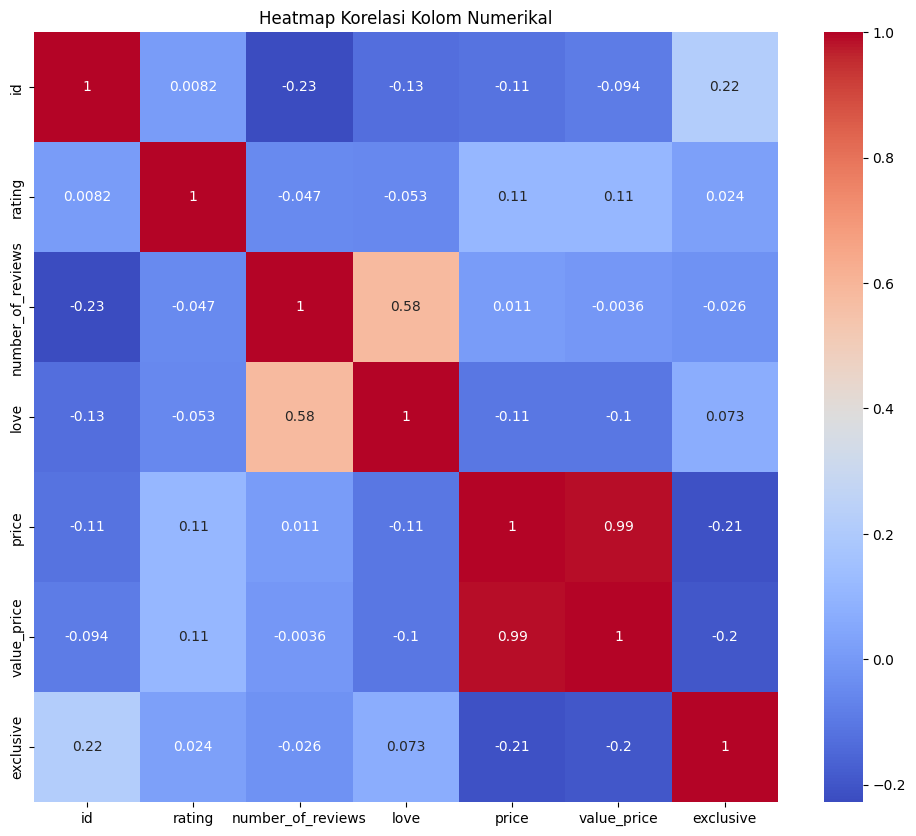

In [ ]:
# Visualisasi
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Kolom Numerikal")
plt.show()

Top 10 Brands by Product Count:
 brand
SEPHORA COLLECTION    320
CLINIQUE              113
Kiehl's Since 1851    101
TOM FORD               79
Bumble and bumble      75
Kérastase              74
tarte                  67
Moroccanoil            67
Dior                   66
Fresh                  63
Name: count, dtype: int64


<ipython-input-9-98e696fd79a8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_brands.values, y=top_10_brands.index, palette="viridis")


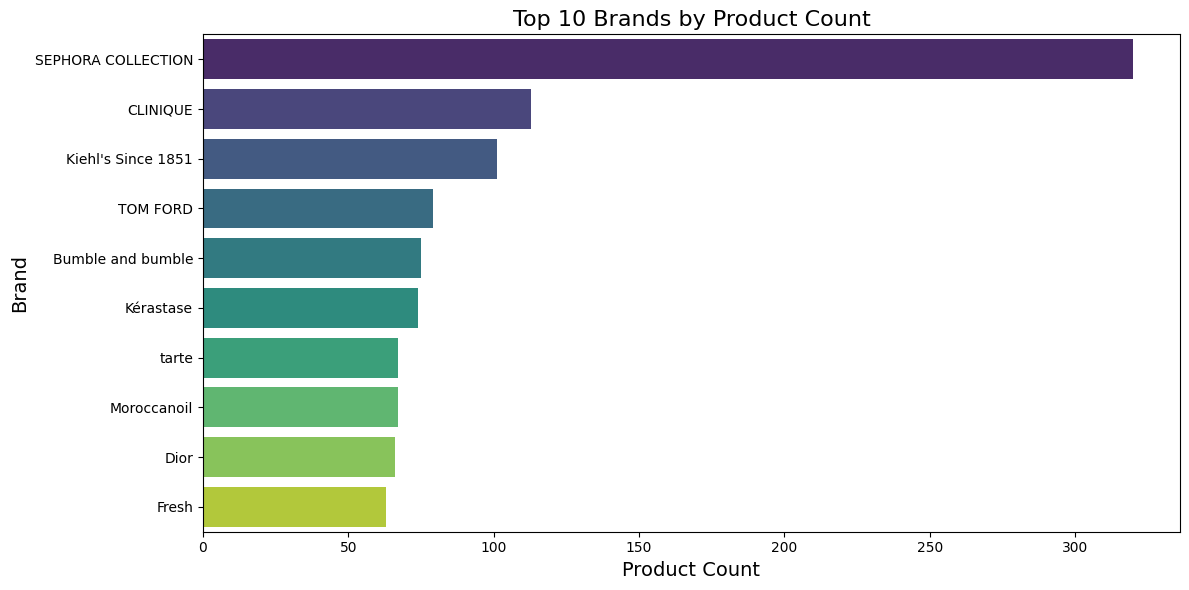

In [ ]:
if "brand" not in df.columns:
    raise ValueError("Kolom 'Brand' tidak ditemukan dalam dataset.")

brand_counts = df['brand'].value_counts()

top_10_brands = brand_counts.head(10)
print("Top 10 Brands by Product Count:\n", top_10_brands)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_brands.values, y=top_10_brands.index, palette="viridis")
plt.xlabel("Product Count", fontsize=14)
plt.ylabel("Brand", fontsize=14)
plt.title("Top 10 Brands by Product Count", fontsize=16)
plt.tight_layout()
plt.show()

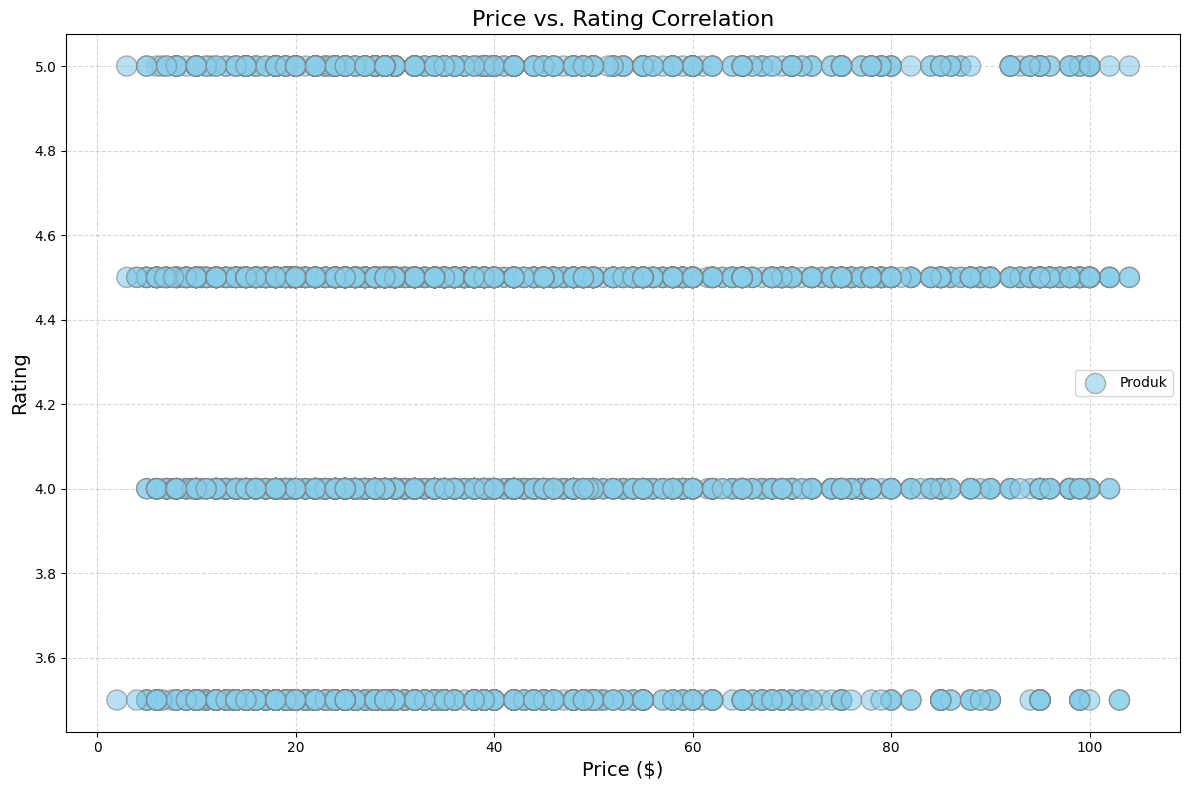

In [ ]:
# Visualisasi 2
if "rating" in df.columns:
    df["rating"] = pd.to_numeric(df["rating"], errors='coerce')
if "review_count" in df.columns:
    df["review_count"] = pd.to_numeric(df["review_count"], errors='coerce')
else:
    df["review_count"] = 1
df.dropna(subset=["price", "rating"], inplace=True)
plt.figure(figsize=(12, 8))
size_factor = 200
sizes = (df["review_count"] / df["review_count"].max()) * size_factor + 10

plt.scatter(df["price"], df["rating"], s=sizes, alpha=0.6, color="skyblue", edgecolor="grey", label="Produk")
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Rating", fontsize=14)
plt.title("Price vs. Rating Correlation", fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

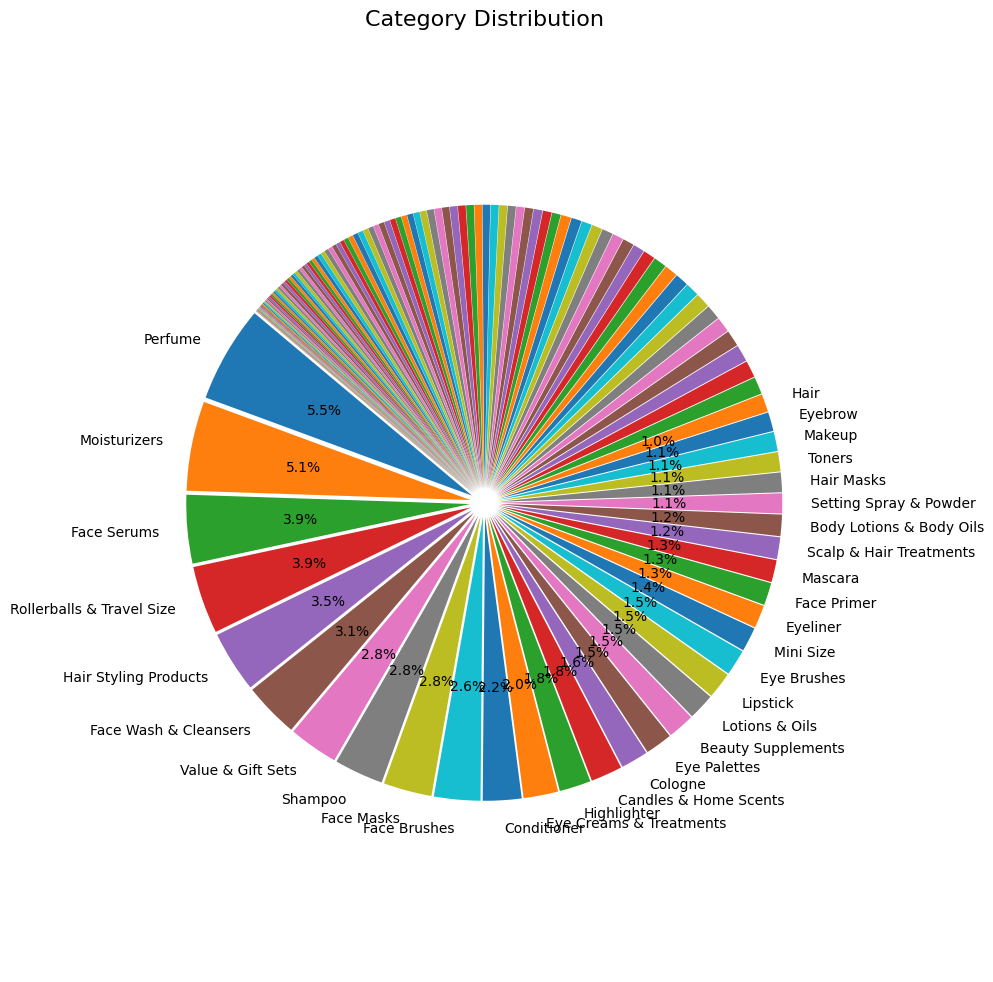

In [ ]:
# Visualisasi 3
if "category" not in df.columns:
    raise ValueError("Kolom 'category' tidak ditemukan dalam dataset.")

category_counts = df['category'].value_counts()
total = category_counts.sum()

new_labels = [cat if (count / total * 100) >= 1 else ''
              for cat, count in zip(category_counts.index, category_counts)]

plt.figure(figsize=(10, 10))
plt.pie(
    category_counts,
    labels=new_labels,
    autopct=custom_autopct,
    explode=[0.05]*len(category_counts)
)
plt.title("Category Distribution", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

required_cols = ['name', 'category', 'ingredients', 'brand']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Kolom '{col}' tidak ditemukan dalam dataset.")

for col in required_cols:
    df[col] = df[col].fillna('')

def create_soup(x):
    return f"{x['category']} {x['ingredients']} {x['brand']}"

df['soup'] = df.apply(create_soup, axis=1)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['soup'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

def get_recommendations(name, cosine_sim=cosine_sim, top_n=10):
    if name not in indices:
        raise ValueError(f"Produk '{name}' tidak ditemukan dalam dataset.")
    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    product_indices = [i[0] for i in sim_scores]
    return df[['name', 'category', 'ingredients', 'brand']].iloc[product_indices]

recommended_products = get_recommendations("Omega 3 Dietary Supplement", cosine_sim, top_n=10)
print("Rekomendasi untuk 'Omega 3 Dietary Supplement':")
print(recommended_products)

Rekomendasi untuk 'Omega 3 Dietary Supplement':
                                             name                  category  \
1898          Double Mousse Gentle Cleansing Foam     Face Wash & Cleansers   
5018                 SUPERMASK - The Peeling Mask                Face Masks   
5464  TROPICALCLEANSE™ Daily Exfoliating Cleanser     Face Wash & Cleansers   
5339                Sugar Wonder Drops Lip Primer    Lip Balms & Treatments   
7571           PRO Strength Lactic Pore Treatment               Face Serums   
692        Power Peel Multi-Acid Resurfacing Pads  Moisturizer & Treatments   
1683     Glycolic Exfoliating & Resurfacing Wipes  Moisturizer & Treatments   
4739                       Firming Sleeping Cream              Night Creams   
3071                     Vitamin C Glow Face Mask                 Mini Size   
2847  Hyaluronic Marine Oil-Free Moisture Cushion              Moisturizers   

                                            ingredients  \
1898   -7 Herbs Complex